<a href="https://colab.research.google.com/github/ddcdi/datastudy2024/blob/main/%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 2주차 미션

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

**Q1**

In [ ]:
# 데이터 준비
df_1 =df.loc[df['상권업종소분류명']=='약국'].copy()

In [ ]:
df_1.groupby('시도명')['시도명'].count().sort_values(ascending=False)

,시도명
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


**Q2**

In [ ]:
# 데이터 준비
df_2=df.loc[df['상권업종소분류명']=='동물병원']

In [ ]:
df_2.groupby('시도명')['시도명'].count().sort_values(ascending=False)

,시도명
시도명,
경기도,992
서울특별시,557
인천광역시,193
경상북도,165
경상남도,161
부산광역시,153
충청남도,131
대구광역시,119
전라북도,111


**Q3**

In [ ]:
# 데이터 분류
df_3=df.loc[(df['시도명']=='서울특별시')&(df["상권업종중분류명"] == "병원")]

In [ ]:
# 피부와 성형이 들어가는 병원 수
num = df_3[df_3['상권업종소분류명'].str.contains('피부|성형')]['시군구명'].value_counts()
# 계산
(num/df_3['시군구명'].value_counts()).round(2).sort_values(ascending=False)

,count
시군구명,
강남구,0.24
서초구,0.17
마포구,0.09
영등포구,0.08
서대문구,0.08
강서구,0.07
강동구,0.07
중구,0.07
양천구,0.07


**Q4**

In [ ]:
import folium
# 데이터 준비
df_4=df.loc[df['상권업종소분류명']=='노인/치매병원']

In [ ]:
# 지도 설정
map=folium.Map(location=(df_4['위도'].mean(),df_4['경도'].mean()),zoom_start=7)
map

In [ ]:
# 지도에 마커 설정
for i in df_4.index:
  tooltip = df_4.loc[i,'상호명']
  location = [df_4.loc[i,'위도'],df_4.loc[i,'경도']]
  folium.Marker(
      location = location,
      tooltip=tooltip # 마우스 커서를 갖다 대면 상호명 표시
  ).add_to(map)
map

# 3주차 미션

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.2 MB/s eta 0:00:00


📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [ ]:
df['연령대코드(5세단위)'].value_counts()

,count
연령대코드(5세단위),
9,130931
11,129849
10,118368
12,112183
13,106507
8,84691
7,77665
6,64958
14,53627


In [ ]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [ ]:
new_list=[]
for i in df['연령대코드(5세단위)'] :
  new_list.append(age_code[i])
new_list

In [ ]:
df['연령대코드(5세단위)']=new_list
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [ ]:
df.rename(columns={'연령대코드(5세단위)':'연령대'},inplace=True) # inplace를 해줘야 바뀐 값이 적용
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대', '시도코드', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [ ]:
pivot_table = pd.pivot_table(
    df,
    index="연령대",
    values='허리둘레',
    aggfunc=['describe']
)
pivot_table

describe                                                         
            25%   50%   75%     count    max       mean   min        std
연령대                                                                     
20~24세     67.5  73.4  81.0   23244.0  999.0  75.152220  47.5  12.251781
25~29세     69.0  76.5  84.2   64898.0  999.0  77.704783  48.0  16.735734
30~34세     72.0  80.1  88.0   77517.0  999.0  81.089268  49.0  22.988111
35~39세     75.0  82.0  89.0   84621.0  999.0  82.094012   9.2  14.522095
40~44세     73.0  80.0  87.0  130912.0  999.0  80.488308  42.1  10.803098
45~49세     74.0  81.0  87.0  118357.0  137.0  80.822449  40.0   9.521622
50~54세     75.0  81.0  87.0  129833.0  142.0  81.062754   6.5   9.095438
55~59세     76.0  82.0  87.5  112175.0  139.0  81.799905  32.0   8.730398
60~64세     77.0  83.0  88.0  106491.0  137.0  82.722769   0.0   8.596176
65~69세     78.0  83.5  89.0   53624.0  129.0  83.588500  50.0   8.443542
70~74세     78.0  84.0  90.0   51586.0  129.8  84.063372  51.0   8.539639
75~79세     78.0  84.0  90.0   25972.0  122.0  84.200127  50.0   8.772306
80~84세     78.0  84.0  90.0   16205.0  120.0  83.751435  38.0   9.041091
85세+       75.0  81.5  88.0    4125.0  999.0  81.736703  34.0  17.325969

📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [ ]:
df_small=df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df_corr=df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<Axes: >

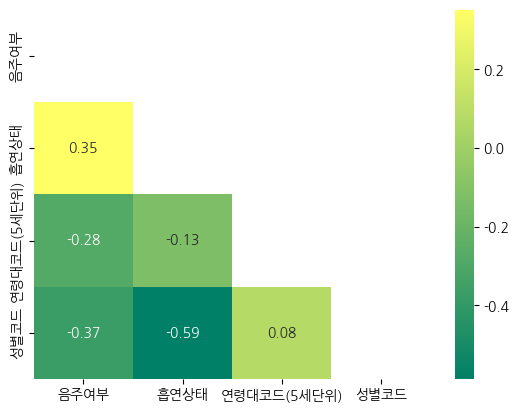

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="summer",mask=mask)

📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [ ]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [ ]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [ ]:
df['흡연상태'].replace(smoke,inplace=True)
df['음주여부'].replace(drink,inplace=True)

In [ ]:
table = pd.crosstab(index=df['음주여부'], columns=df['흡연상태']).reset_index()
# crosstab은 pivot_table 같은 타입이게 때문에 melt함수를 사용해 올바른 데이터 프라임 형태로 바꿔줘야함
# id_vars은 변환할 때 고정된 열(변하지 않는 열)을 지정합니다
# var_name은 녹인 열의 이름을 지정
# value_name은 녹인 값의 이름
table_melted = table.melt(id_vars='음주여부',var_name='흡연상태',value_name='count')
table_melted

,음주여부,흡연상태,count
0,마심,끊음,120779
1,안마심,끊음,55334
2,마심,흡연안함,213743
3,안마심,흡연안함,394503
4,마심,흡연중,162166
5,안마심,흡연중,52845


<Axes: xlabel='흡연상태', ylabel='count'>

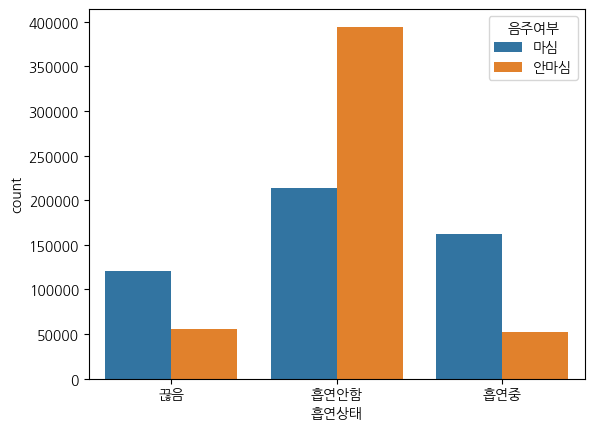

In [ ]:
sns.barplot(data=table_melted,x='흡연상태',y='count',hue='음주여부')

📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

In [ ]:
df.columns
df['체중(5Kg 단위)'].head()

In [ ]:
df_weight = df.loc[df['체중(5Kg 단위)'] >= 120, ["총콜레스테롤", "감마지티피", "음주여부",'흡연상태']]
df_weight.head()

,총콜레스테롤,감마지티피,음주여부,흡연상태
1219,182.0,47.0,안마심,흡연중
2309,107.0,19.0,안마심,흡연중
3497,214.0,111.0,마심,흡연중
3685,218.0,58.0,안마심,끊음
5788,194.0,35.0,안마심,흡연안함


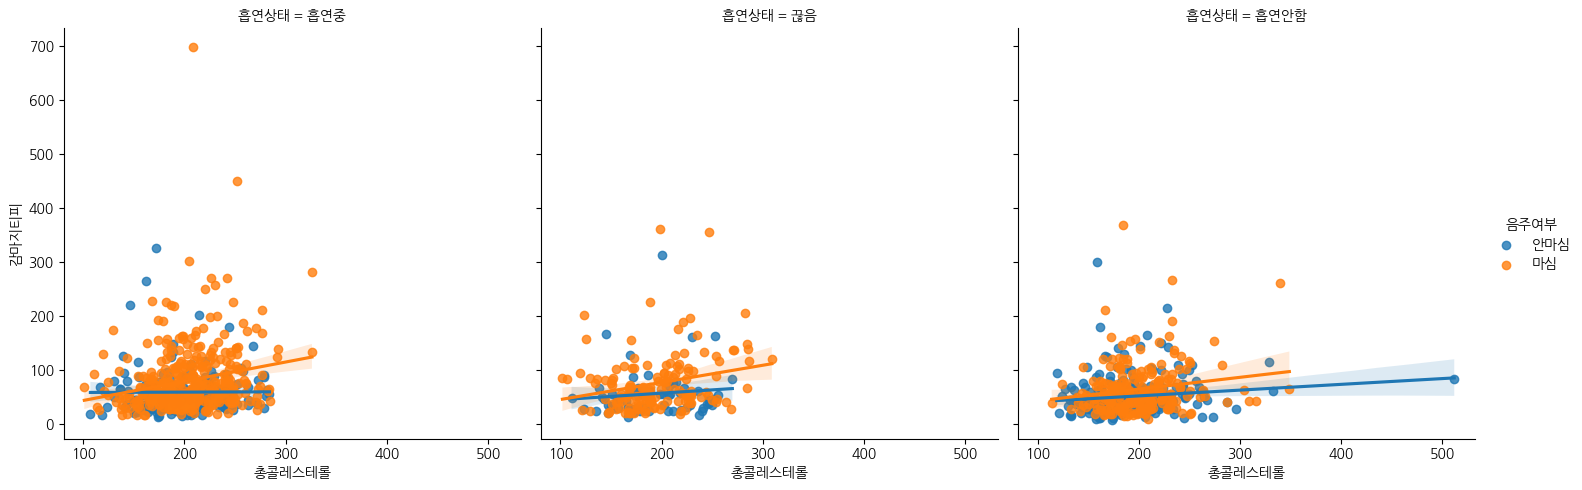

In [ ]:
sns.lmplot(df_weight,x='총콜레스테롤',y='감마지티피',hue='음주여부',col='흡연상태')

📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

In [ ]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [ ]:
df['연령대코드(5세단위)'].replace(age_code,inplace=True)

In [ ]:
df_eye=df.loc[(df['시력(좌)']!=9.9)&(df['시력(우)']!=9.9),['성별코드','연령대코드(5세단위)','시력(좌)','시력(우)']]

In [ ]:
table_eyeL=pd.pivot_table(df_eye,index=['연령대코드(5세단위)','성별코드'],values='시력(좌)',aggfunc='mean').reset_index()
table_eyeR=pd.pivot_table(df_eye,index=['연령대코드(5세단위)','성별코드'],values='시력(우)',aggfunc='mean').reset_index()

table_eye_meltedL = table_eyeL.melt(id_vars=['연령대코드(5세단위)', '성별코드'], value_vars=['시력(좌)'],value_name='시력 (좌)')
table_eye_meltedR = table_eyeR.melt(id_vars=['연령대코드(5세단위)', '성별코드'], value_vars=['시력(우)'],value_name='시력 (우)')
print(table_eye_meltedL.head())
print(table_eye_meltedR.head())

  연령대코드(5세단위)  성별코드 variable    시력 (좌)
0      20~24세     1    시력(좌)  1.092213
1      20~24세     2    시력(좌)  0.989032
2      25~29세     1    시력(좌)  1.108857
3      25~29세     2    시력(좌)  1.016270
4      30~34세     1    시력(좌)  1.116939
  연령대코드(5세단위)  성별코드 variable    시력 (우)
0      20~24세     1    시력(우)  1.083185
1      20~24세     2    시력(우)  0.982924
2      25~29세     1    시력(우)  1.103328
3      25~29세     2    시력(우)  1.005915
4      30~34세     1    시력(우)  1.112457


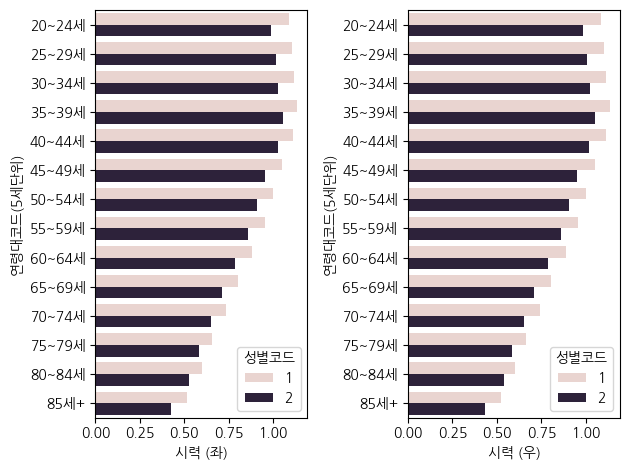

In [ ]:
import matplotlib.pyplot as plt
# subplot 사용
fig, axes = plt.subplots(1, 2)
# 첫 번째 subplot: 평균 시력 (가로 막대 그래프)
sns.barplot(data=table_eye_meltedL, x='시력 (좌)', y='연령대코드(5세단위)', hue='성별코드', ax=axes[0])

# 두 번째 subplot: 평균 시력 (가로 막대 그래프)
sns.barplot(data=table_eye_meltedR, x='시력 (우)', y='연령대코드(5세단위)', hue='성별코드', ax=axes[1])

plt.tight_layout()
plt.show()

# 4주차 미션

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [ ]:
print(df.shape)
print(df.head())
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)
  국가(대륙)별        상품군별   판매유형별        시점   데이터
0      미국  컴퓨터 및 주변기기  면세점 이외  2017.1/4  1054
1      미국  컴퓨터 및 주변기기  면세점 이외  2017.2/4   946
2      미국  컴퓨터 및 주변기기  면세점 이외  2017.3/4   791
3      미국  컴퓨터 및 주변기기  면세점 이외  2017.4/4   854
4      미국  컴퓨터 및 주변기기  면세점 이외  2018.1/4  2033


,count
판매유형별,
면세점 이외,2772


📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.


In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
df['연도']=df['시점'].map(lambda x : int(x.split('.')[0]))
df['분기']=df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [ ]:
df.rename(columns={'데이터':'백만'},inplace=True)

In [ ]:
df[['백만','연도','분기']].describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

In [ ]:
df_table=pd.pivot_table(data=df,index='국가(대륙)별',columns='연도',values='백만',aggfunc='sum')
df_table

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [ ]:
df_2020=df[df['연도']==2022].groupby(['국가(대륙)별'])['상품군별'].value_counts().unstack() # unstack으로 데이터프레임 재구성
df_2020

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,2,2,2,2,2,2,2,2,2,2,2,2,2,2
대양주,2,2,2,2,2,2,2,2,2,2,2,2,2,2
미국,2,2,2,2,2,2,2,2,2,2,2,2,2,2
아세안(ASEAN),2,2,2,2,2,2,2,2,2,2,2,2,2,2
유럽연합(EU),2,2,2,2,2,2,2,2,2,2,2,2,2,2
일본,2,2,2,2,2,2,2,2,2,2,2,2,2,2
중국,2,2,2,2,2,2,2,2,2,2,2,2,2,2
중남미,2,2,2,2,2,2,2,2,2,2,2,2,2,2
중동,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
print(df_2020.columns)

Index(['가전·전자·통신기기', '기 타', '농축수산물', '사무·문구', '생활용품 및 자동차용품', '서 적', '소프트웨어',
       '스포츠·레저용품', '아동·유아용품', '음·식료품', '음반·비디오·악기', '의류 및 패션 관련상품',
       '컴퓨터 및 주변기기', '화장품'],
      dtype='object', name='상품군별')


In [ ]:
df_melt=df_2020.melt()
df_melt

,상품군별,value
0,가전·전자·통신기기,2
1,가전·전자·통신기기,2
2,가전·전자·통신기기,2
3,가전·전자·통신기기,2
4,가전·전자·통신기기,2
...,...,...
121,화장품,2
122,화장품,2
123,화장품,2
124,화장품,2


KeyError: 'x'

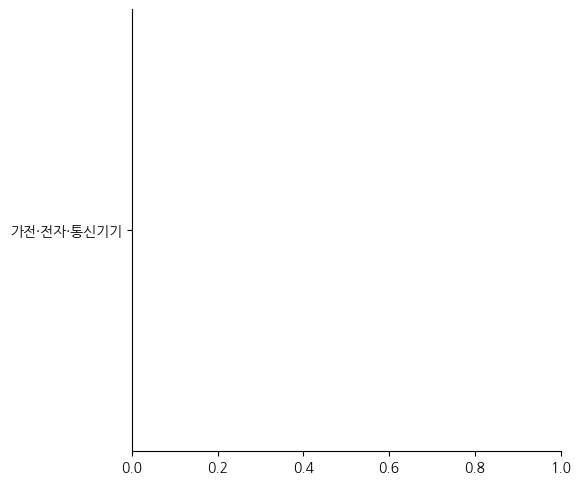

In [ ]:
sns.relplot(data=df_melt,x='국가(대륙)별',y='상품군별',kind='line')

📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

In [ ]:
df['상품군별'].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [ ]:
df_4=df[df['국가(대륙)별'].isin(["미국","중국",'일본'])&df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"])]
df_4.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


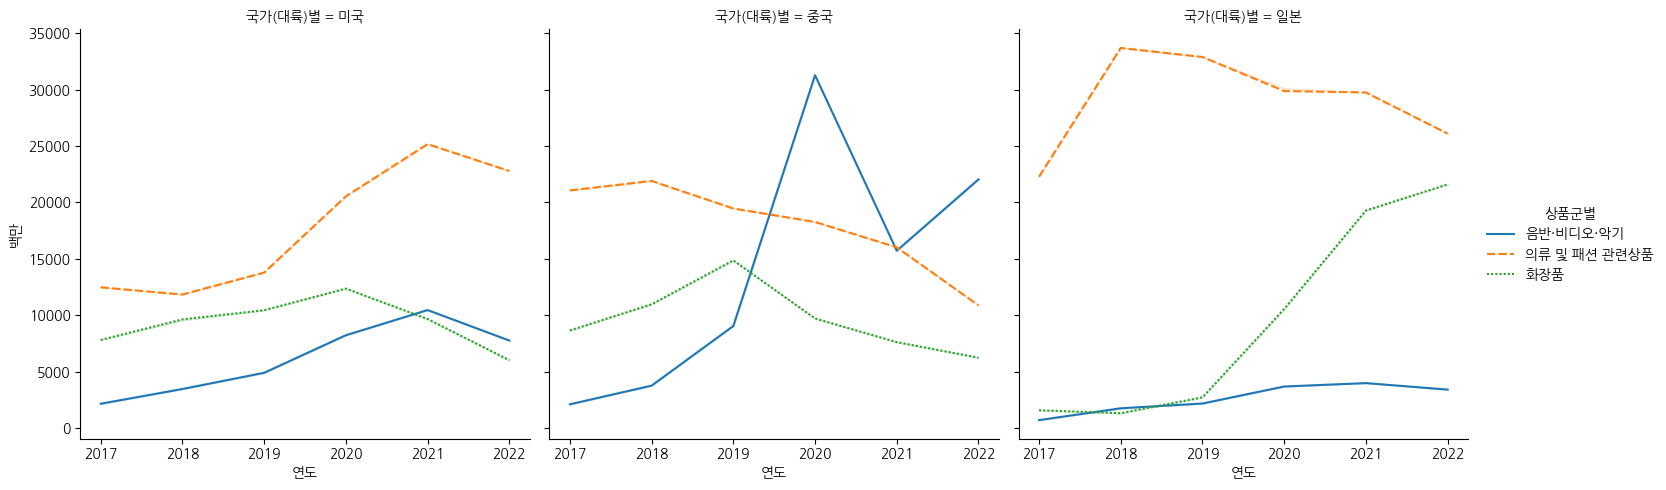

In [ ]:
sns.relplot(data=df_4,x='연도',y='백만',hue='상품군별',col='국가(대륙)별',kind='line',col_wrap=3,ci=False,style='상품군별')

📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

In [ ]:
df_raw=pd.read_csv('/content/drive/MyDrive/데이터/도로교통공단_월별 주야별 교통사고 통계_20231231.csv',encoding='CP949')
df_raw.head()

,발생월,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,주,8682,98,2209,9440,759
1,1,야,5798,92,1539,6349,530
2,2,주,8056,95,2149,8710,710
3,2,야,5228,86,1419,5553,500
4,3,주,10393,109,2600,11132,880


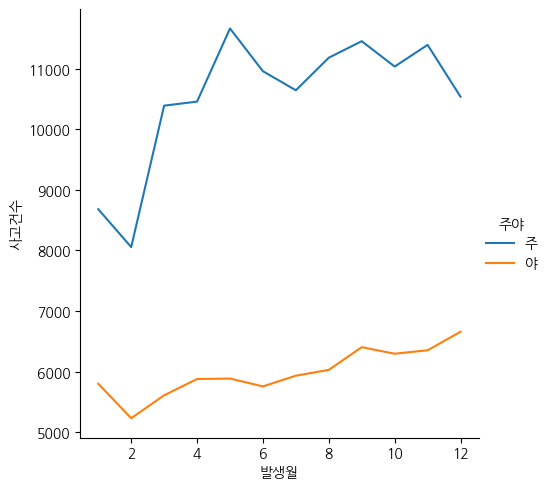

In [ ]:
sns.relplot(data=df_raw,x='발생월',y='사고건수',hue='주야',kind='line')

In [ ]:
df_5=df_raw.melt(id_vars=['발생월', '주야'], value_vars=['중상자수', '경상자수','사망자수'],var_name='상해정도',value_name='인명피해(명)')
df_5.head()

,발생월,주야,상해정도,인명피해(명)
0,1,주,중상자수,2209
1,1,야,중상자수,1539
2,2,주,중상자수,2149
3,2,야,중상자수,1419
4,3,주,중상자수,2600


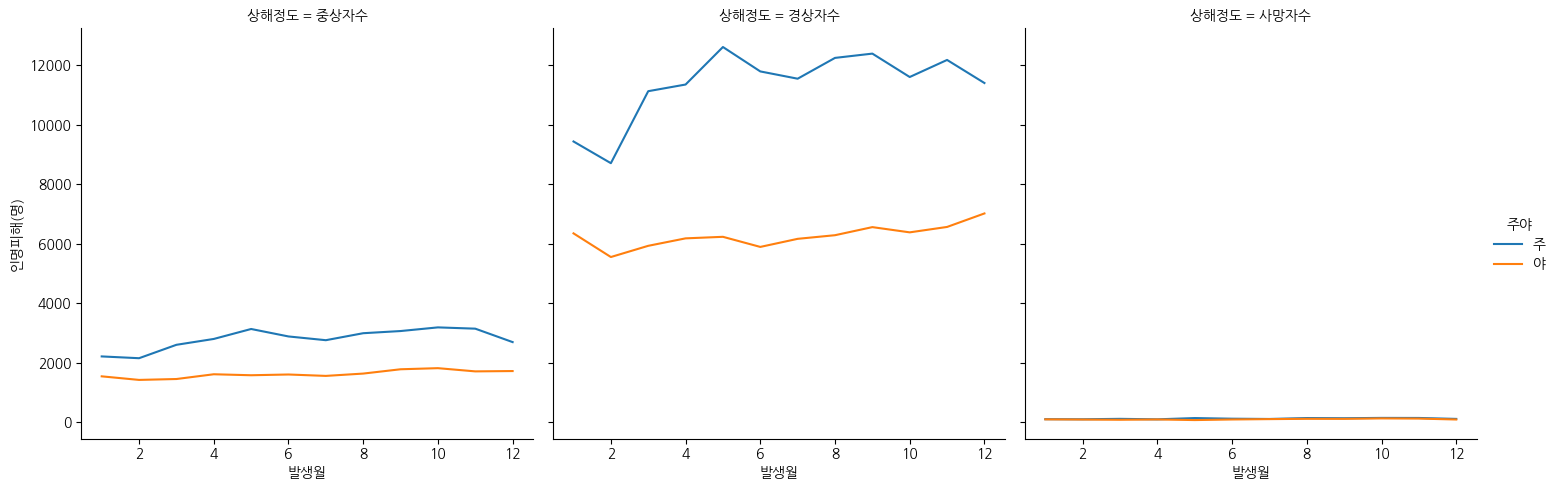

In [ ]:
sns.relplot(data=df_5,x='발생월',y='인명피해(명)',col='상해정도',hue='주야',kind='line')